In [39]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [40]:
# Code starts here

# Load the data
df = pd.read_csv('train.csv')

df.drop(['Unnamed: 0','Id'], axis=1, inplace=True)
df.head()




,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,35,1,0.839193,6000.0,14,0,2,0,2.0
1,0,0.151166,30,0,0.941212,5000.0,12,0,2,0,0.0
2,1,1.149154,29,0,0.195402,2000.0,10,1,0,0,0.0
3,0,0.308043,36,0,0.853733,6200.0,11,0,2,0,0.0
4,0,0.070246,62,0,35.000000,NaN,8,0,0,0,0.0


In [48]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           23756
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3123
dtype: int64

In [52]:
# Independent variables
X = df.drop('SeriousDlqin2yrs', axis=1)

# Dependent variable
y = df['SeriousDlqin2yrs']

# Check the value counts
count = y.value_counts()
# Split the data set into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

### Visualize the data

- Plot a scatter plot for all the independent variables with the dependent variable
- Replace the missing values and modify some column values(as required by you).
- Clean the data, apply some data preprocessing and engineering techniques.

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


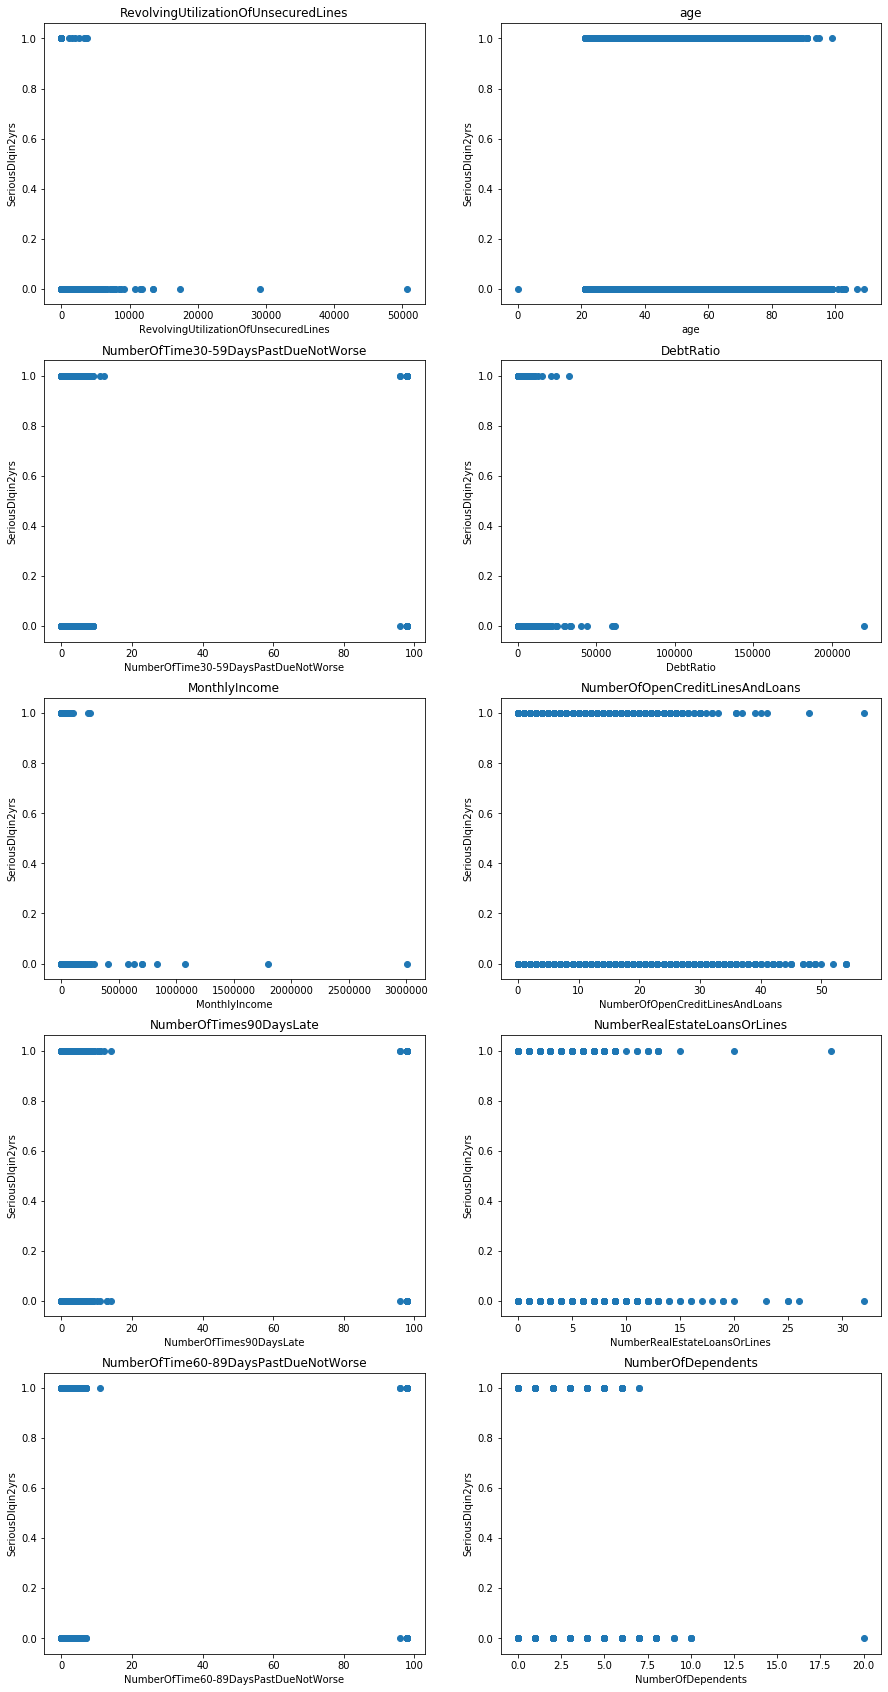

In [53]:
# save list of all the columns of X in cols
cols = X_train.columns.tolist()
print(cols)

# create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

# nested for loops to iterate over all the features and plot the same
for i in range(5):
    for j in range(2):
        col= cols[i * 2 + j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(X_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('SeriousDlqin2yrs')






In [54]:
# Check for null values
print("X_train Null  data: \n",X_train.isnull().sum())
print("X_test Null  data: \n",X_test.isnull().sum())

# Filling the missing values for columns in training data set
X_train['MonthlyIncome'].fillna(value=X_train['MonthlyIncome'].median(), inplace=True)
X_train['NumberOfDependents'].fillna(value=X_train['NumberOfDependents'].median(), inplace=True)

# Filling the missing values for columns in testing data set
X_test['MonthlyIncome'].fillna(value=X_test['MonthlyIncome'].median(), inplace=True)
X_test['NumberOfDependents'].fillna(value=X_test['NumberOfDependents'].median(), inplace=True)

# Checking for null values
print("X_train",X_train.isnull().sum().sum())
print("X_test",X_test.isnull().sum().sum())

X_train Null  data: 
 RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           16738
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2212
dtype: int64
X_test Null  data: 
 RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7018
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       911
dtype: int64
X_train 0
X_test 0


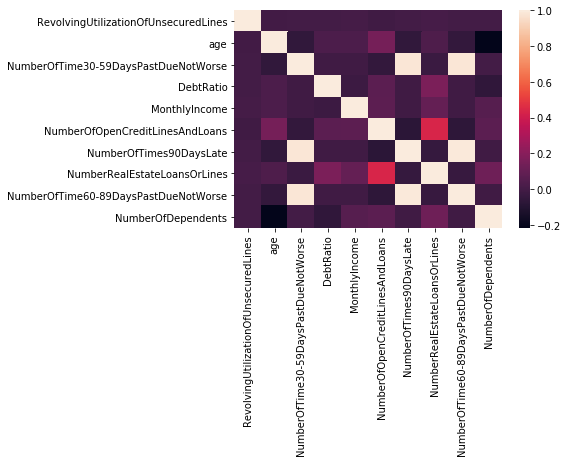

In [55]:
# Correlation matrix for training set
corr = X_train.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr)

# drop the columns which are correlated amongst each other except one
X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)
X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model building

- Predict the values after building a Machine learning model
- Apply some technique to deal with the imbalance dataset
- Try improving upon the `roc_auc_score` ([ROC-AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))

accuracy 0.9304444444444444
roc_auc_score 0.7189233392779868


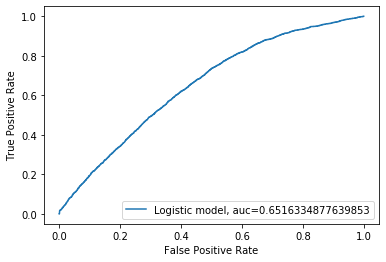

In [57]:
# Import Logistic regression model and accuracy score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Instantiate the model in a variable in log_reg
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X_train, y_train)

# Predictions of the training dataset
y_pred = log_reg.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_pred, y_test)
print("accuracy", accuracy)

score = roc_auc_score(y_pred , y_test)
print("roc_auc_score",score)

# Plot the auc-roc curve
score = roc_auc_score(y_pred , y_test)
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()











0    111930
1      8070
Name: SeriousDlqin2yrs, dtype: int64


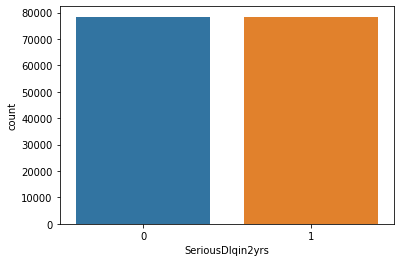

In [58]:
# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

# Check value counts of target variable for data imbalance
count = y.value_counts()
print(count)

# Instantiate smote
smote = SMOTE(random_state=9)

# Fit Smote on training set
X_sample, y_sample = smote.fit_sample(X_train, y_train)

# Check for count of class
sns.countplot(y_sample)

roc_auc_score 0.5629880877971163


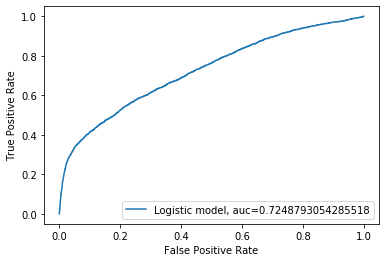

Confusion matrix
 [[27270  6225]
 [ 1236  1269]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     33495
           1       0.17      0.51      0.25      2505

    accuracy                           0.79     36000
   macro avg       0.56      0.66      0.57     36000
weighted avg       0.90      0.79      0.84     36000



In [59]:
# Fit logistic regresion model on X_sample and y_sample
from sklearn.metrics import f1_score, confusion_matrix, classification_report
log_reg.fit(X_sample, y_sample)

# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

# Store the auc_roc score
score = roc_auc_score(y_pred , y_test)
print("roc_auc_score",score)
# Store the probablity of any class
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
# roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print('Confusion matrix' + '\n' ,confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))

roc_auc_score 0.6158405306641281


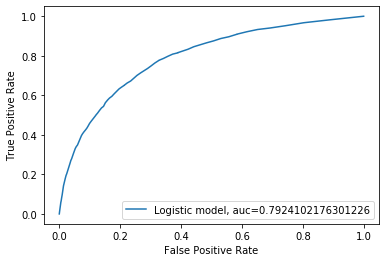

Confusion matrix
 [[30782  2713]
 [ 1465  1040]]
Classification_report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     33495
           1       0.28      0.42      0.33      2505

    accuracy                           0.88     36000
   macro avg       0.62      0.67      0.63     36000
weighted avg       0.91      0.88      0.89     36000



In [60]:
# Import RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForrestClassifier to a variable rf.
rf = RandomForestClassifier(random_state = 9)

# Fit the model on training data.
rf.fit(X_sample, y_sample)

# Store the result predicted in y_pred
y_pred = rf.predict(X_test)

# Store the auc_roc score
score = roc_auc_score(y_pred , y_test)
print("roc_auc_score",score)
# Store the probablity of any class
y_pred_proba = rf.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
# roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print('Confusion matrix' + '\n' ,confusion_matrix(y_test, rf.predict(X_test)))
print('Classification_report' + '\n' + classification_report(y_test,y_pred))

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [62]:
# Code Starts here

test = pd.read_csv('test.csv')
test.head()
# Code ends here

,Unnamed: 0,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,108655,108656,0.219007,42,0,0.481043,12000.0,11,0,5,0,2.0
1,143812,143813,0.347880,34,0,0.027036,6250.0,6,0,0,0,2.0
2,65001,65002,0.514498,30,0,0.068629,6250.0,3,0,0,0,0.0
3,148708,148709,0.375009,28,0,0.159952,6626.0,4,0,0,0,1.0
4,128843,128844,0.182710,50,0,0.028994,5000.0,15,0,0,0,0.0


In [65]:
test.drop(['Unnamed: 0','Id'], axis=1, inplace=True)

In [66]:
# Check for null values
print("test  data: \n",test.isnull().sum())

# Filling the missing values for columns in training data set
test['MonthlyIncome'].fillna(value=test['MonthlyIncome'].median(), inplace=True)
test['NumberOfDependents'].fillna(value=test['NumberOfDependents'].median(), inplace=True)


# Checking for null values
print("test",test.isnull().sum().sum())


test  data: 
 RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           5975
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       801
dtype: int64
test 0


In [67]:
# Filling the missing values for columns in training data set
test['MonthlyIncome'].fillna(value=test['MonthlyIncome'].median(), inplace=True)
test['NumberOfDependents'].fillna(value=test['NumberOfDependents'].median(), inplace=True)

In [68]:
# drop the columns which are correlated amongst each other except one
test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'], axis=1, inplace=True)


In [69]:
test.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,0.219007,42,0.481043,12000.0,11,0,5,2.0
1,0.347880,34,0.027036,6250.0,6,0,0,2.0
2,0.514498,30,0.068629,6250.0,3,0,0,0.0
3,0.375009,28,0.159952,6626.0,4,0,0,1.0
4,0.182710,50,0.028994,5000.0,15,0,0,0.0


In [70]:
test_data=pd.read_csv('test.csv')

In [72]:
id_ = test_data['Id']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test = scaler.fit_transform(test)


In [74]:
id_= test_data['Id']
# Predict on the test data
y_pred_rf = rf.predict(test)

print(y_pred_rf)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'SeriousDlqin2yrs':y_pred_rf})

# Convert the sample submission file into a csv file
sample_submission.to_csv('output_rf.csv',index=False)


[0 0 0 ... 1 1 0]
